In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [44]:
app_train = pd.read_csv('../data/raw/application_tr.csv')

print(app_train.shape)

app_train.head()


(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
app_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [46]:
app_train.isnull().sum().sort_values(ascending=False).head(55)


COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
COMMONAREA_MEDI                 214865
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_MEDI                204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [47]:
app_train["TARGET"].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [48]:
categorical_cols = app_train.select_dtypes(include=["object"]).columns
numerical_cols = app_train.select_dtypes(exclude=["object"]).columns

print("Categóricas:", len(categorical_cols))
print("Numéricas:", len(numerical_cols))

Categóricas: 16
Numéricas: 106


ANÁLISIS EXPLORATORIO - HOME CREDIT DEFAULT RISK

📊 DIMENSIONES
Train: (307511, 122)
Test: (48744, 121)

ANÁLISIS DEL TARGET

Distribución del TARGET:
  0 (Pagó bien): 282,686 (91.93%)
  1 (Dificultades): 24,825 (8.07%)

⚠️  DATASET DESBALANCEADO - Ratio: 11.4:1

ANÁLISIS DE VALORES FALTANTES

Variables con missing: 67 de 122

Top 15 variables con más missing:
                          Missing_Count  Missing_Pct
COMMONAREA_AVG                   214865    69.872297
COMMONAREA_MODE                  214865    69.872297
COMMONAREA_MEDI                  214865    69.872297
NONLIVINGAPARTMENTS_MEDI         213514    69.432963
NONLIVINGAPARTMENTS_MODE         213514    69.432963
NONLIVINGAPARTMENTS_AVG          213514    69.432963
FONDKAPREMONT_MODE               210295    68.386172
LIVINGAPARTMENTS_AVG             210199    68.354953
LIVINGAPARTMENTS_MEDI            210199    68.354953
LIVINGAPARTMENTS_MODE            210199    68.354953
FLOORSMIN_MODE                   208642    67.848630
F

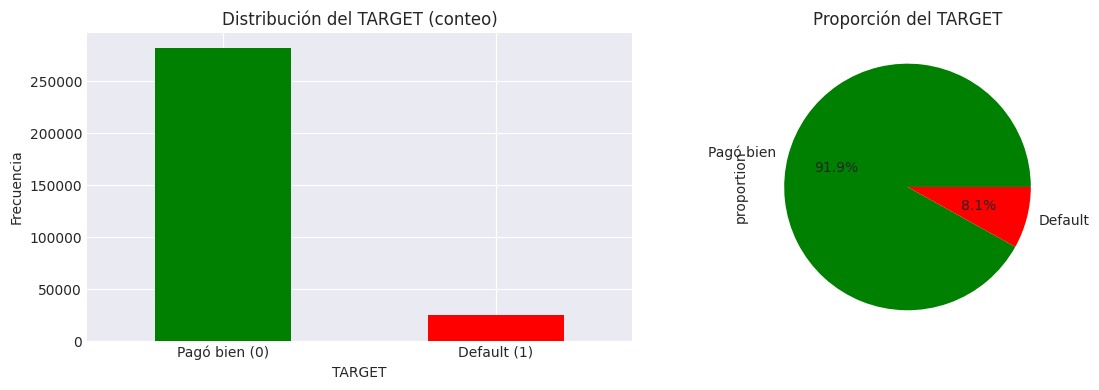

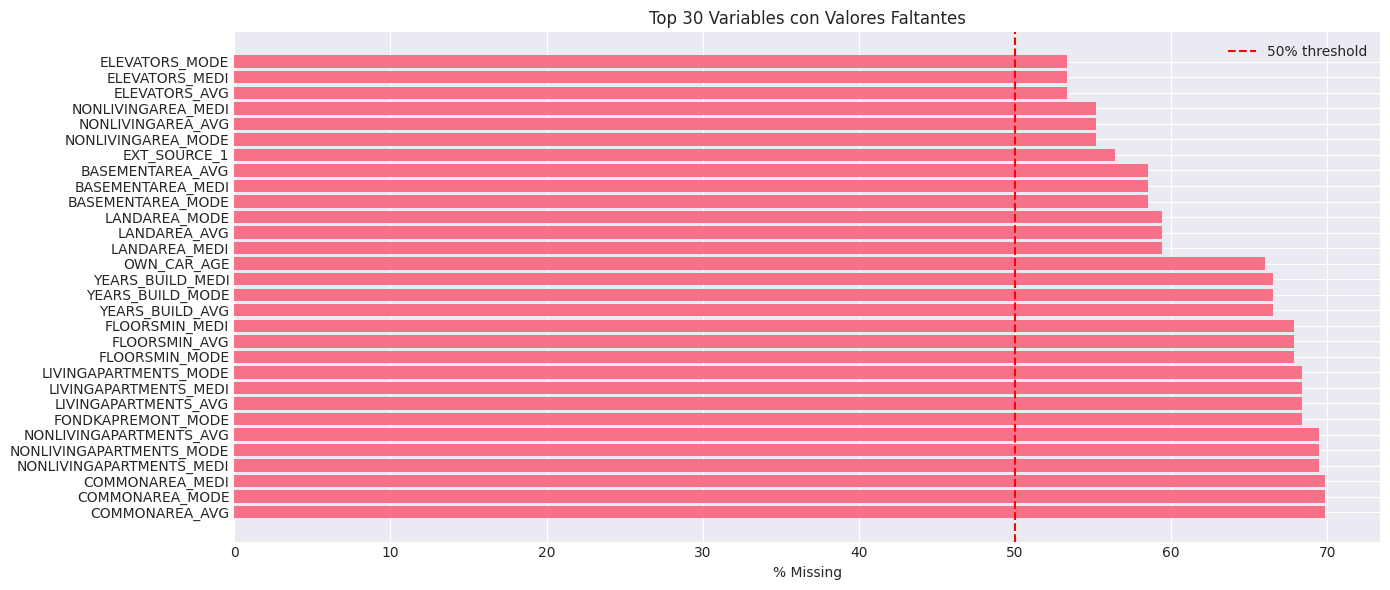

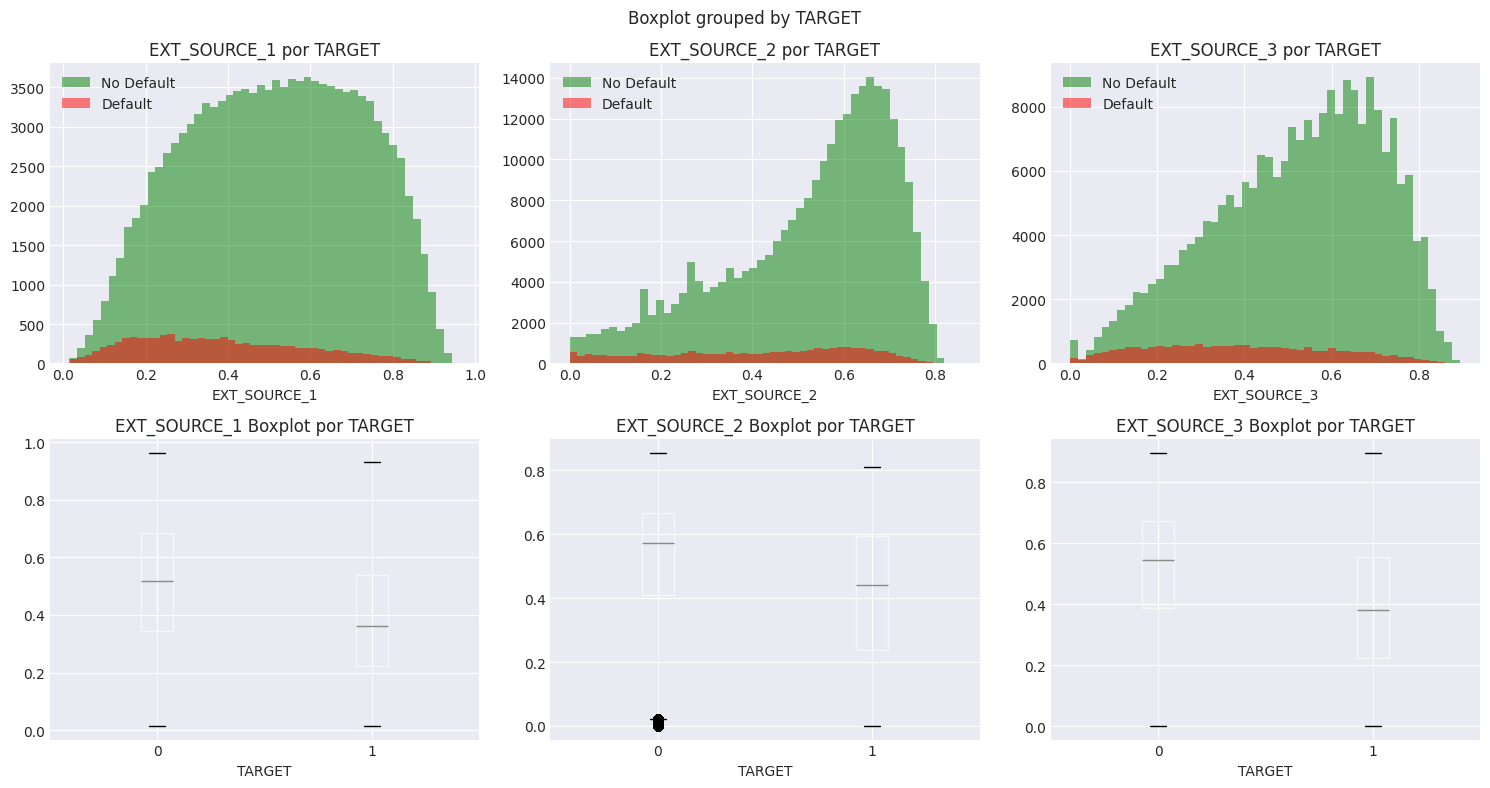

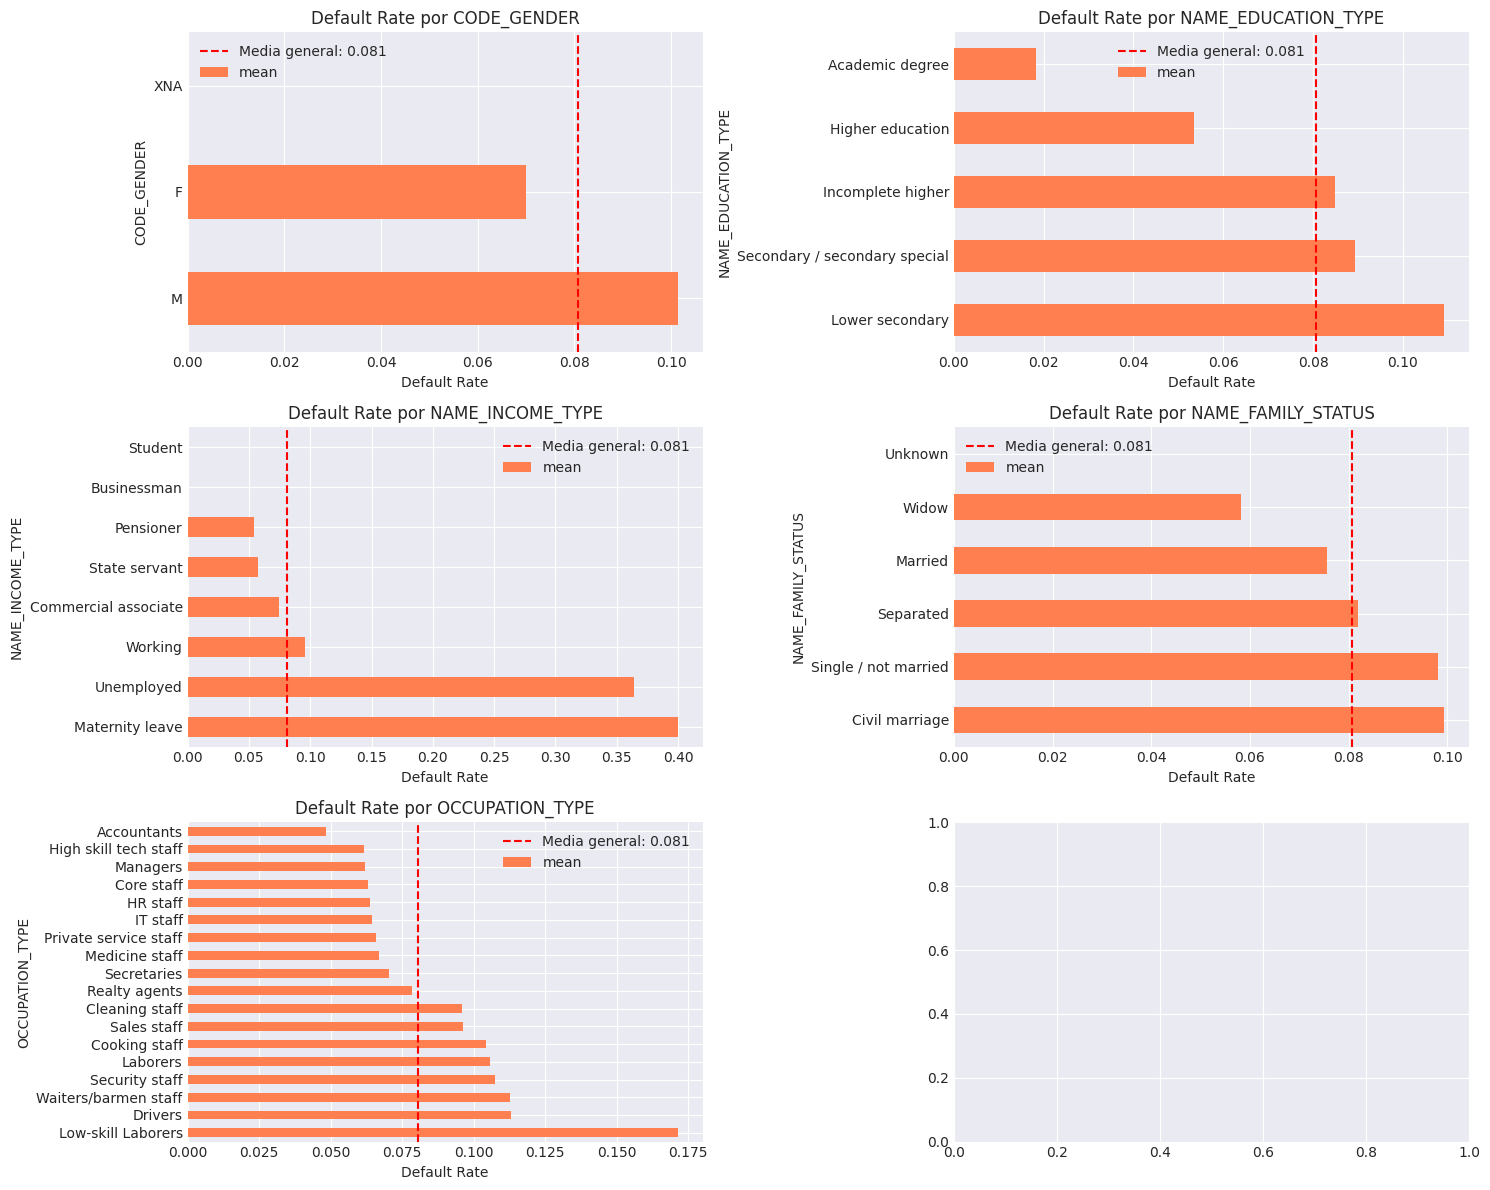

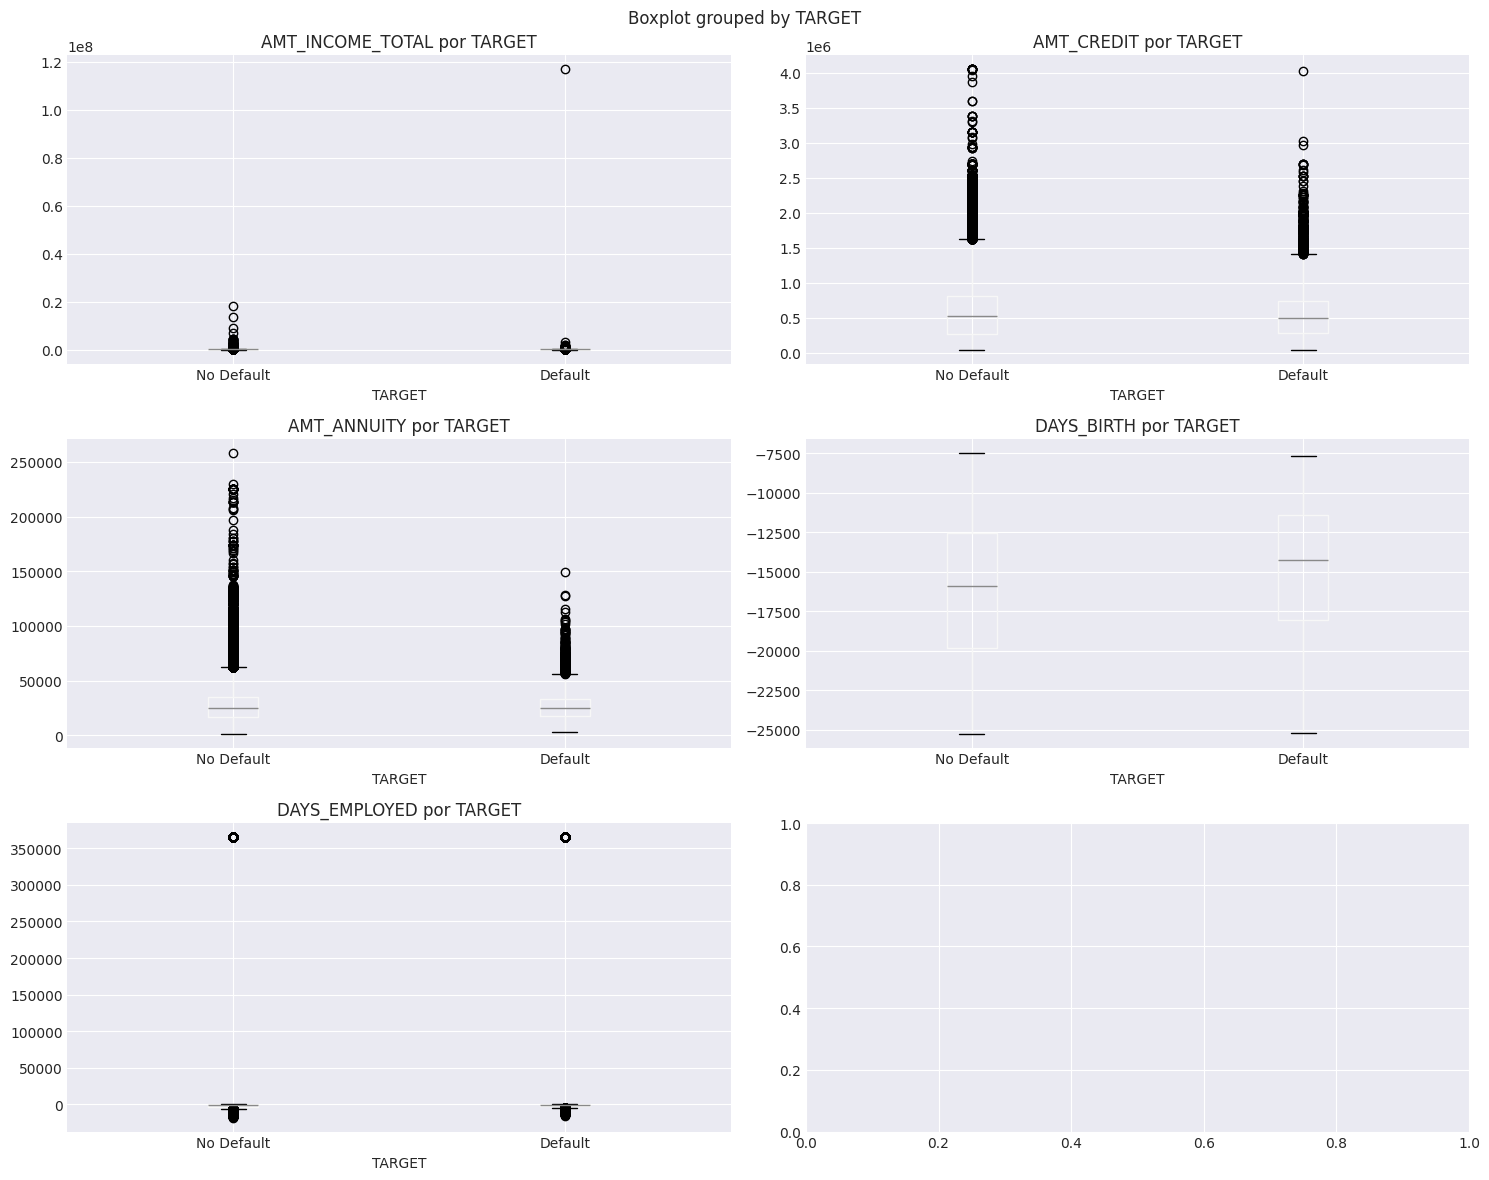

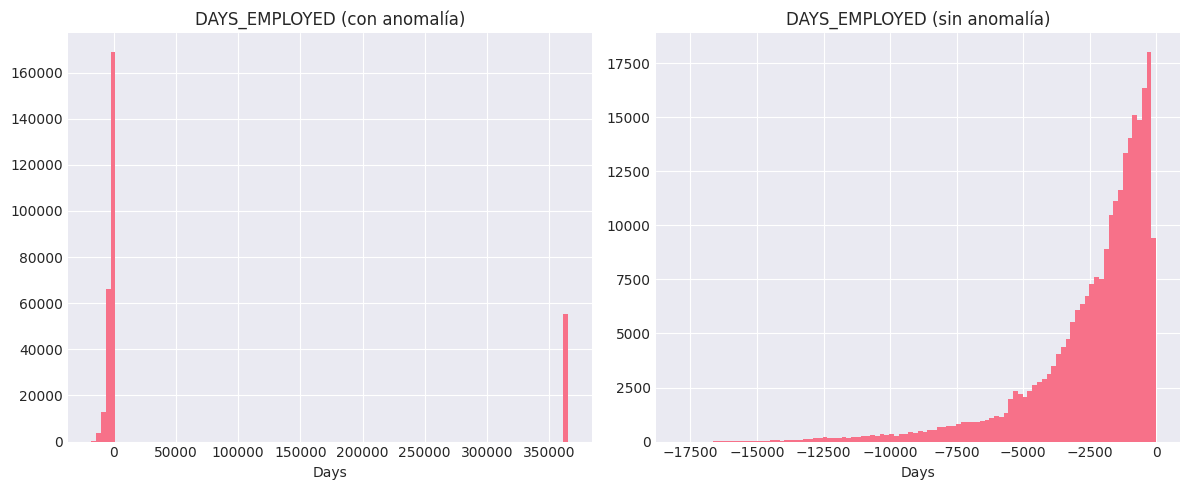

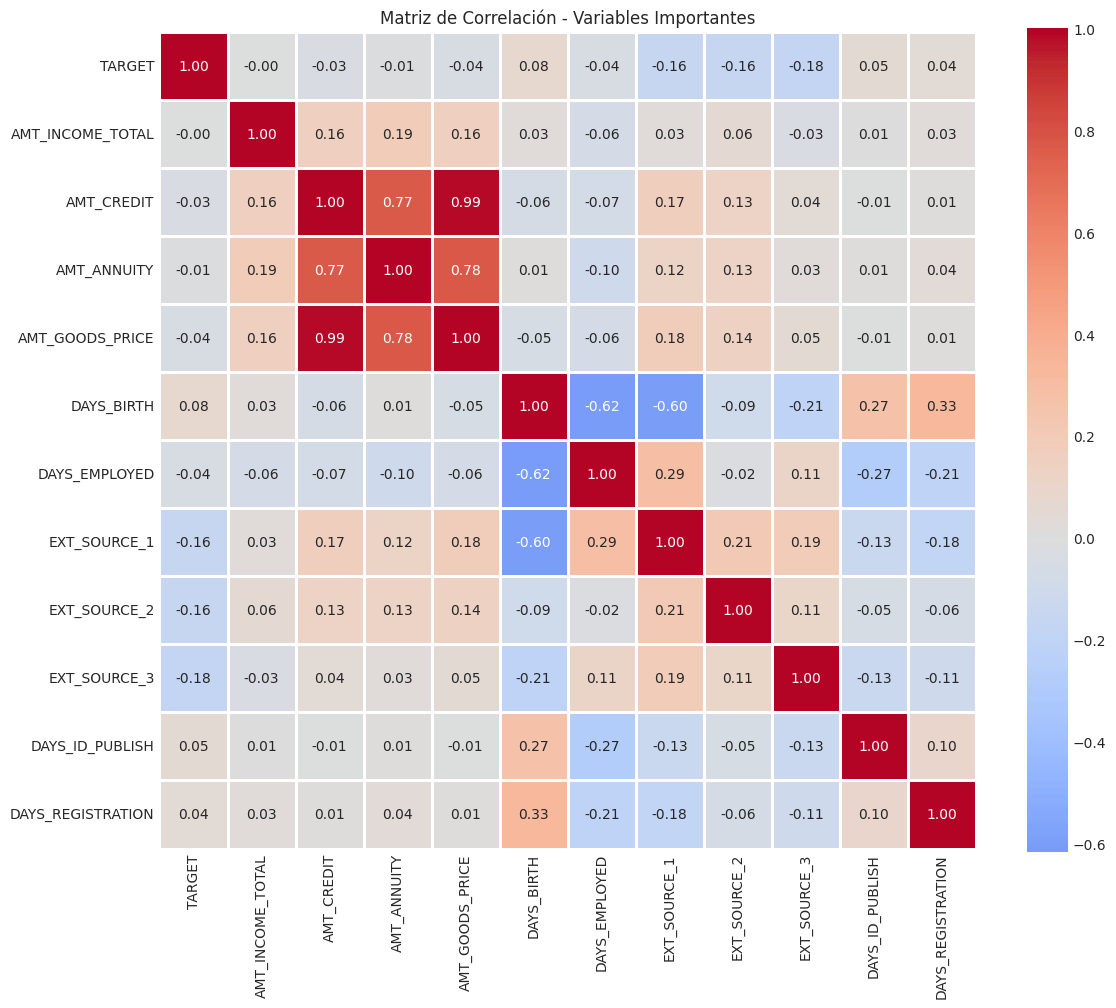

In [49]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# =============================================================================
# PARTE 1: CARGA Y OVERVIEW INICIAL
# =============================================================================

print("="*80)
print("ANÁLISIS EXPLORATORIO - HOME CREDIT DEFAULT RISK")
print("="*80)

# Cargar tabla principal
app_train = pd.read_csv('../data/raw/application_tr.csv')
app_test = pd.read_csv('../data/raw/application_ts.csv')

print(f"\n📊 DIMENSIONES")
print(f"Train: {app_train.shape}")
print(f"Test: {app_test.shape}")

# =============================================================================
# PARTE 2: ANÁLISIS DEL TARGET (CRÍTICO)
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DEL TARGET")
print("="*80)

target_counts = app_train['TARGET'].value_counts()
target_pct = app_train['TARGET'].value_counts(normalize=True) * 100

print(f"\nDistribución del TARGET:")
print(f"  0 (Pagó bien): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"  1 (Dificultades): {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\n⚠️  DATASET DESBALANCEADO - Ratio: {target_pct[0]/target_pct[1]:.1f}:1")

# Visualización
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
app_train['TARGET'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Distribución del TARGET (conteo)')
ax[0].set_xlabel('TARGET')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticklabels(['Pagó bien (0)', 'Default (1)'], rotation=0)

app_train['TARGET'].value_counts(normalize=True).plot(kind='pie',
                                                       autopct='%1.1f%%',
                                                       ax=ax[1],
                                                       colors=['green', 'red'],
                                                       labels=['Pagó bien', 'Default'])
ax[1].set_title('Proporción del TARGET')
plt.tight_layout()


# =============================================================================
# PARTE 3: ANÁLISIS DE MISSING VALUES
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)

missing = app_train.isnull().sum()
missing_pct = (missing / len(app_train)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Pct': missing_pct
}).sort_values('Missing_Pct', ascending=False)

missing_df = missing_df[missing_df['Missing_Count'] > 0]

print(f"\nVariables con missing: {len(missing_df)} de {app_train.shape[1]}")
print(f"\nTop 15 variables con más missing:")
print(missing_df.head(15))

# Categorizar missing
high_missing = missing_df[missing_df['Missing_Pct'] > 50]
medium_missing = missing_df[(missing_df['Missing_Pct'] > 10) & (missing_df['Missing_Pct'] <= 50)]
low_missing = missing_df[missing_df['Missing_Pct'] <= 10]

print(f"\n📌 RESUMEN MISSING:")
print(f"  >50% missing: {len(high_missing)} variables")
print(f"  10-50% missing: {len(medium_missing)} variables")
print(f"  <10% missing: {len(low_missing)} variables")

# Visualización
plt.figure(figsize=(14, 6))
top_missing = missing_df.head(30)
plt.barh(range(len(top_missing)), top_missing['Missing_Pct'])
plt.yticks(range(len(top_missing)), top_missing.index)
plt.xlabel('% Missing')
plt.title('Top 30 Variables con Valores Faltantes')
plt.axvline(x=50, color='red', linestyle='--', label='50% threshold')
plt.legend()
plt.tight_layout()


# =============================================================================
# PARTE 4: ANÁLISIS DE VARIABLES CLAVE (EXT_SOURCE)
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE EXT_SOURCE (Variables Externas - MUY PREDICTIVAS)")
print("="*80)

ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for col in ext_sources:
    print(f"\n{col}:")
    print(f"  Missing: {app_train[col].isnull().sum()} ({app_train[col].isnull().sum()/len(app_train)*100:.1f}%)")
    print(f"  Range: [{app_train[col].min():.4f}, {app_train[col].max():.4f}]")
    print(f"  Mean: {app_train[col].mean():.4f}")

    # Correlación con TARGET
    corr = app_train[[col, 'TARGET']].corr().iloc[0, 1]
    print(f"  Correlación con TARGET: {corr:.4f}")

# Visualización de EXT_SOURCE vs TARGET
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for idx, col in enumerate(ext_sources):
    # Distribución por TARGET
    ax = axes[0, idx]
    app_train[app_train['TARGET']==0][col].hist(bins=50, alpha=0.5, label='No Default', ax=ax, color='green')
    app_train[app_train['TARGET']==1][col].hist(bins=50, alpha=0.5, label='Default', ax=ax, color='red')
    ax.set_title(f'{col} por TARGET')
    ax.legend()
    ax.set_xlabel(col)

    # Boxplot
    ax = axes[1, idx]
    app_train.boxplot(column=col, by='TARGET', ax=ax)
    ax.set_title(f'{col} Boxplot por TARGET')
    ax.set_xlabel('TARGET')

plt.tight_layout()


# =============================================================================
# PARTE 5: VARIABLES CATEGÓRICAS CLAVE
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

categorical_vars = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',
                   'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, var in enumerate(categorical_vars):
    if var in app_train.columns:
        # Target rate por categoría
        target_rate = app_train.groupby(var)['TARGET'].agg(['mean', 'count', 'sum'])
        target_rate = target_rate.sort_values('mean', ascending=False)

        print(f"\n{var}:")
        print(f"  Categorías únicas: {app_train[var].nunique()}")
        print(f"  Missing: {app_train[var].isnull().sum()}")
        print(f"\n  Target Rate por categoría:")
        print(target_rate)

        # Gráfico
        ax = axes[idx]
        target_rate['mean'].plot(kind='barh', ax=ax, color='coral')
        ax.set_title(f'Default Rate por {var}')
        ax.set_xlabel('Default Rate')
        ax.axvline(x=app_train['TARGET'].mean(), color='red', linestyle='--',
                  label=f'Media general: {app_train["TARGET"].mean():.3f}')
        ax.legend()

plt.tight_layout()


# =============================================================================
# PARTE 6: VARIABLES NUMÉRICAS CLAVE
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE VARIABLES NUMÉRICAS CLAVE")
print("="*80)

numerical_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED']

# Estadísticas descriptivas por TARGET
print("\nEstadísticas por TARGET:")
for var in numerical_vars:
    print(f"\n{var}:")
    stats_by_target = app_train.groupby('TARGET')[var].describe()
    print(stats_by_target)

    # Test de diferencia de medias
    group_0 = app_train[app_train['TARGET']==0][var].dropna()
    group_1 = app_train[app_train['TARGET']==1][var].dropna()
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    print(f"  T-test p-value: {p_value:.6f} {'***' if p_value < 0.001 else ''}")

# Visualización
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]
    app_train.boxplot(column=var, by='TARGET', ax=ax)
    ax.set_title(f'{var} por TARGET')
    ax.set_xlabel('TARGET')
    plt.sca(ax)
    plt.xticks([1, 2], ['No Default', 'Default'])

plt.tight_layout()


# =============================================================================
# PARTE 7: DETECCIÓN DE ANOMALÍAS EN DAYS_EMPLOYED
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS ESPECIAL: DAYS_EMPLOYED (Anomalía conocida)")
print("="*80)

# Detectar el valor anómalo (365243 = desempleados codificados)
anomaly_value = 365243
anomaly_count = (app_train['DAYS_EMPLOYED'] == anomaly_value).sum()
anomaly_pct = anomaly_count / len(app_train) * 100

print(f"\n⚠️  Valor anómalo {anomaly_value} encontrado:")
print(f"  Frecuencia: {anomaly_count:,} ({anomaly_pct:.2f}%)")
print(f"  Interpretación: Probablemente representa desempleados o pensionados")

# Distribución sin anomalía
days_employed_clean = app_train[app_train['DAYS_EMPLOYED'] != anomaly_value]['DAYS_EMPLOYED']
print(f"\nEstadísticas sin anomalía:")
print(days_employed_clean.describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
app_train['DAYS_EMPLOYED'].hist(bins=100)
plt.title('DAYS_EMPLOYED (con anomalía)')
plt.xlabel('Days')

plt.subplot(1, 2, 2)
days_employed_clean.hist(bins=100)
plt.title('DAYS_EMPLOYED (sin anomalía)')
plt.xlabel('Days')
plt.tight_layout()


# =============================================================================
# PARTE 8: MATRIZ DE CORRELACIÓN
# =============================================================================

print("\n" + "="*80)
print("MATRIZ DE CORRELACIÓN CON TARGET")
print("="*80)

# Seleccionar variables numéricas importantes
important_vars = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']

correlation_data = app_train[important_vars].corr()
target_corr = correlation_data['TARGET'].sort_values(ascending=False)

print("\nTop correlaciones con TARGET:")
print(target_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación - Variables Importantes')
plt.tight_layout()


# =============================================================================
# PARTE 9: RESUMEN Y RECOMENDACIONES
# =============================================================================

print("\n" + "="*80)
print("RESUMEN Y SIGUIENTES PASOS")
print("="*80)

print("\n🎯 HALLAZGOS PRINCIPALES:")
print(f"  1. Dataset desbalanceado: {target_pct[1]:.1f}% de defaults")
print(f"  2. EXT_SOURCE_2 tiene mejor cobertura y correlación con TARGET")
print(f"  3. DAYS_EMPLOYED tiene anomalía (365243) que debe tratarse")
print(f"  4. {len(high_missing)} variables con >50% missing (considerar eliminar)")
print(f"  5. Variables categóricas muestran diferentes default rates")

print("\n📋 RECOMENDACIONES PARA FEATURE ENGINEERING:")
print("  1. Crear flag para DAYS_EMPLOYED anómalo")
print("  2. Convertir DAYS_* a años (más interpretable)")
print("  3. Crear ratios: AMT_CREDIT/AMT_INCOME, AMT_ANNUITY/AMT_INCOME")
print("  4. Imputar EXT_SOURCE con modelos o estrategia específica")
print("  5. Agregar datos de tablas secundarias (bureau, previous_application)")
print("  6. Encoding de variables categóricas")

In [50]:
print(app_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].count())

EXT_SOURCE_1    134133
EXT_SOURCE_2    306851
EXT_SOURCE_3    246546
dtype: int64


In [51]:
ext_sources = app_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]]
print(ext_sources.corr())


              EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
EXT_SOURCE_1      1.000000      0.213982      0.186846
EXT_SOURCE_2      0.213982      1.000000      0.109167
EXT_SOURCE_3      0.186846      0.109167      1.000000


In [52]:
keywords = ["AVG", "MEDI", "MODE"]
cols_to_drop = [col for col in app_train.columns if any(k in col for k in keywords)]

# Agregar las columnas específicas
cols_to_drop += ["EXT_SOURCE_1","OWN_CAR_AGE"]

# Eliminar columnas
app_train_clean = app_train.drop(columns=cols_to_drop)

print("Columnas eliminadas:", cols_to_drop)
print("Dimensiones originales:", app_train.shape)
print("Dimensiones después de limpiar:", app_train_clean.shape)

Columnas eliminadas: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'EXT_SO

In [53]:
nulls = app_train_clean.isnull().sum().sort_values(ascending=False)
print(nulls.head(20))

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
NAME_TYPE_SUITE                1292
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
SK_ID_CURR                        0
CNT_CHILDREN                      0
dtype: int64


In [54]:
nulls_pct = (app_train_clean.isnull().mean() * 100).sort_values(ascending=False)
print(nulls_pct.head(20))

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
NAME_TYPE_SUITE                0.420148
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
SK_ID_CURR                     0.000000
CNT_CHILDREN                   0.000000
dtype: float64


/tmp/ipykernel_10196/1859895470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulls_pct.index[:20], y=nulls_pct.values[:20], palette="viridis")


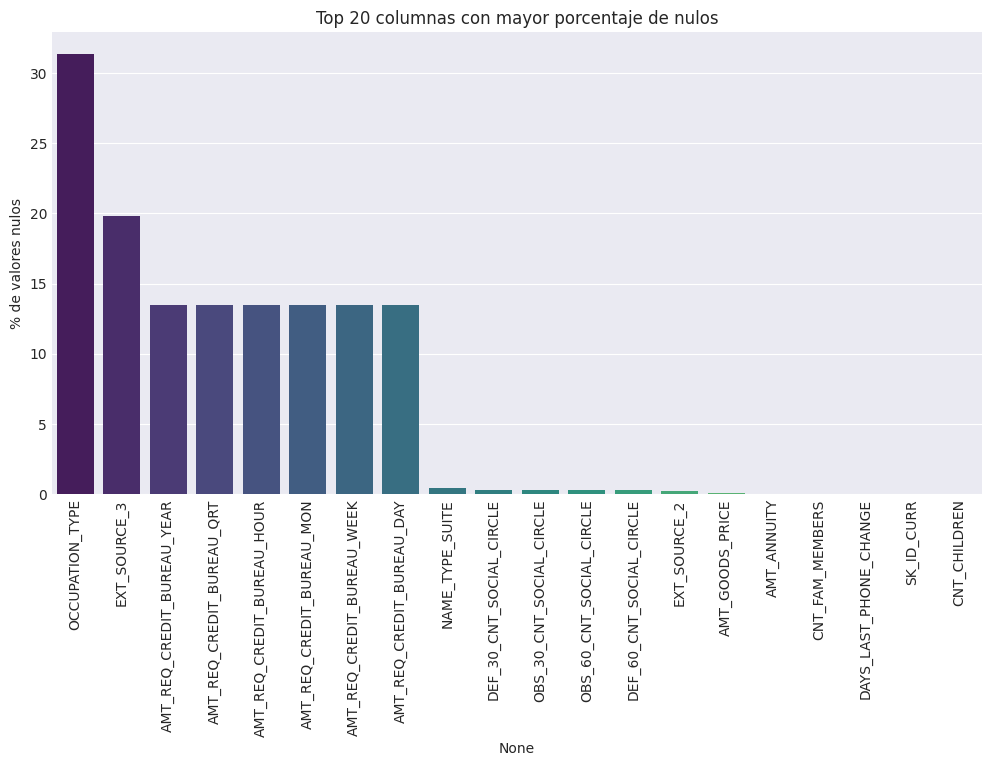

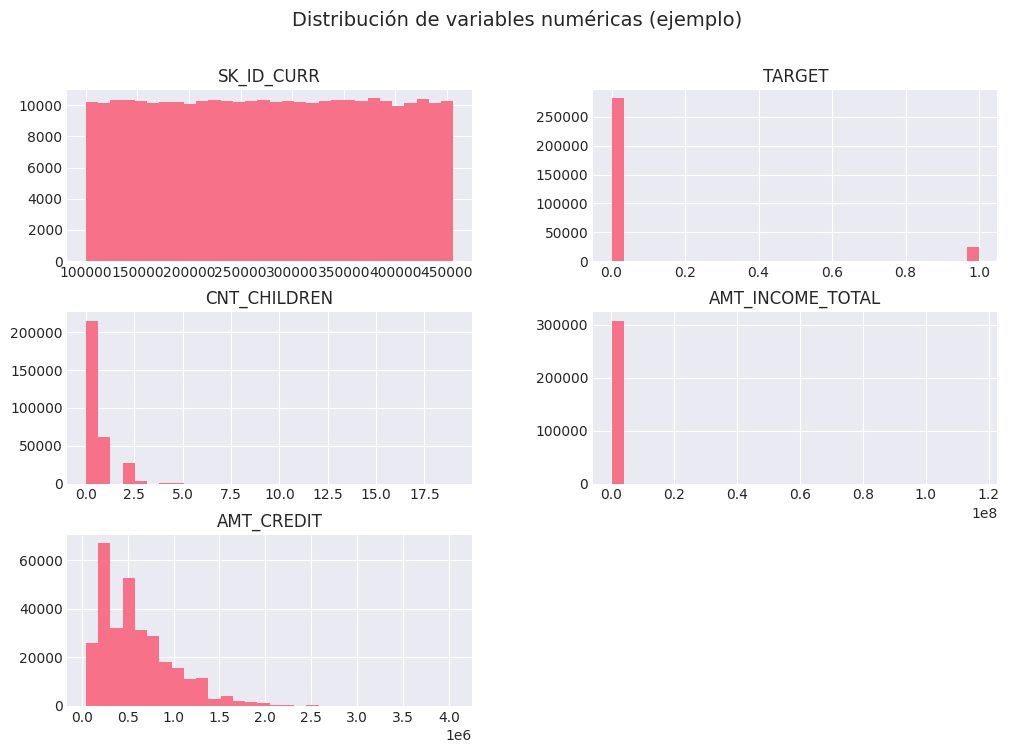

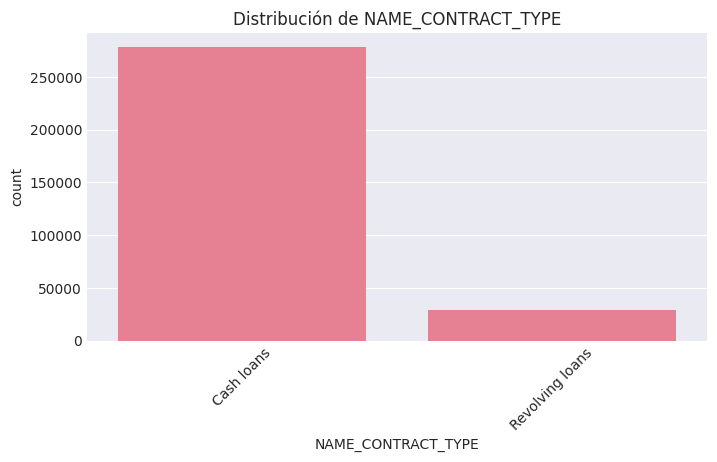

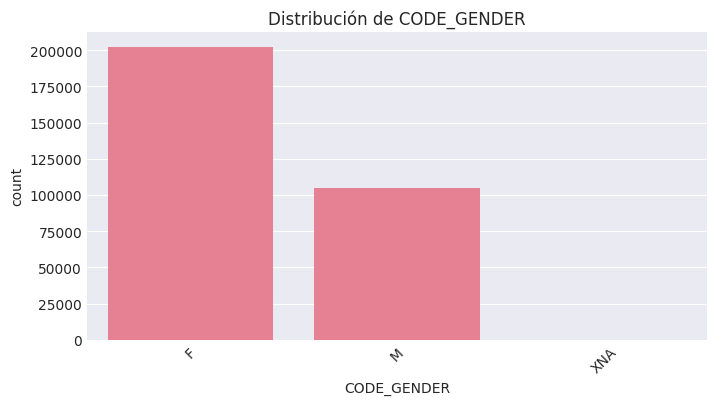

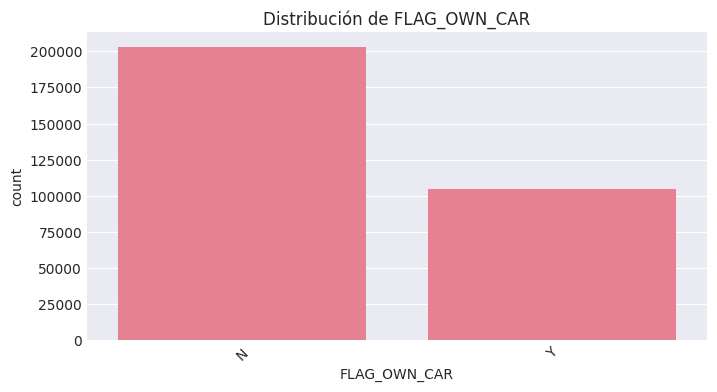

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(x=nulls_pct.index[:20], y=nulls_pct.values[:20], palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 20 columnas con mayor porcentaje de nulos")
plt.ylabel("% de valores nulos")
plt.show()
# Distribución de algunas variables numéricas
num_cols = app_train_clean.select_dtypes(include=["float64","int64"]).columns[:5]  # primeras 5 numéricas
app_train_clean[num_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribución de variables numéricas (ejemplo)", fontsize=14)
plt.show()

# Distribución de variables categóricas
cat_cols = app_train_clean.select_dtypes(include=["object"]).columns[:3]  # primeras 3 categóricas
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=app_train_clean, order=app_train_clean[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {col}")
    plt.show()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


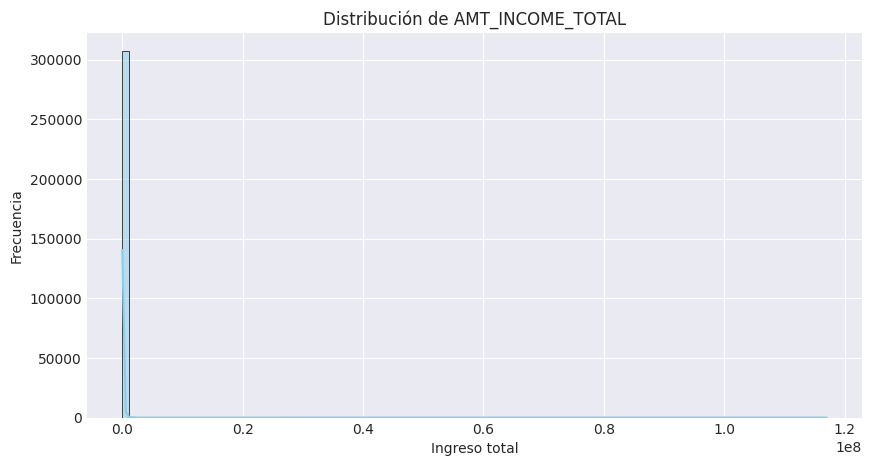

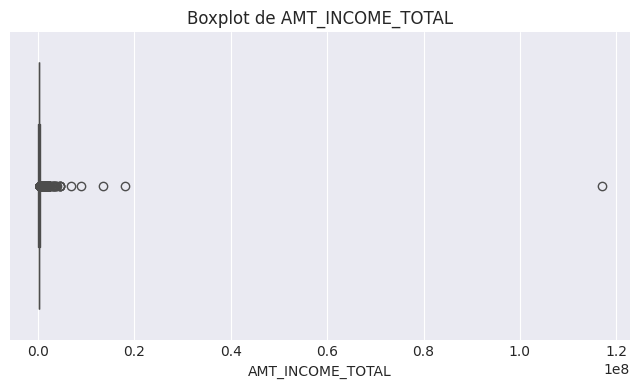

/tmp/ipykernel_10196/1761664080.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=app_train_clean, palette=["green","red"])


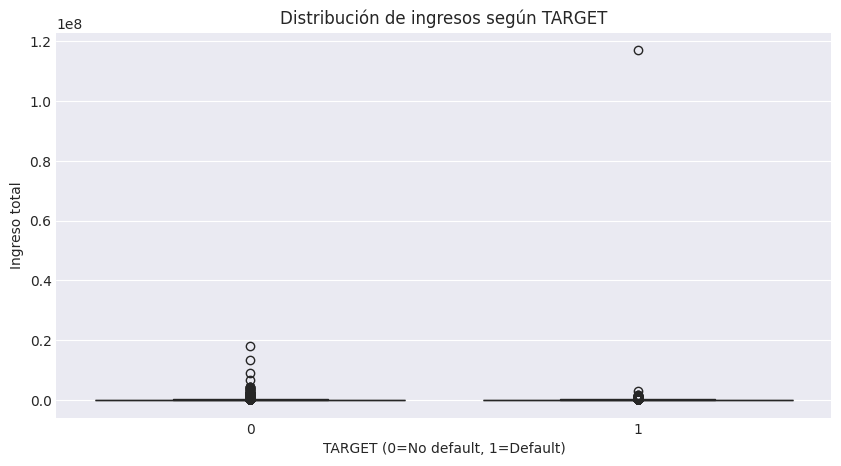

Valores únicos: 2548
Top 10 ingresos más frecuentes:
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
Name: count, dtype: int64


In [56]:
# 1. Información básica
print(app_train_clean["AMT_INCOME_TOTAL"].describe())

# 2. Distribución general
plt.figure(figsize=(10,5))
sns.histplot(app_train_clean["AMT_INCOME_TOTAL"], bins=100, kde=True, color="skyblue")
plt.title("Distribución de AMT_INCOME_TOTAL")
plt.xlabel("Ingreso total")
plt.ylabel("Frecuencia")
plt.show()

# 3. Boxplot para detectar outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=app_train_clean["AMT_INCOME_TOTAL"], color="orange")
plt.title("Boxplot de AMT_INCOME_TOTAL")
plt.show()

# 4. Relación con TARGET
plt.figure(figsize=(10,5))
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=app_train_clean, palette=["green","red"])
plt.title("Distribución de ingresos según TARGET")
plt.xlabel("TARGET (0=No default, 1=Default)")
plt.ylabel("Ingreso total")
plt.show()

# 5. Valores únicos y top categorías
print("Valores únicos:", app_train_clean["AMT_INCOME_TOTAL"].nunique())
print("Top 10 ingresos más frecuentes:")
print(app_train_clean["AMT_INCOME_TOTAL"].value_counts().head(10))

In [57]:
# Valores únicos
print(app_train_clean["CODE_GENDER"].unique())

# Cantidad de valores únicos
print(app_train_clean["CODE_GENDER"].nunique())

# Conteo de cada valor
print(app_train_clean["CODE_GENDER"].value_counts())


['M' 'F' 'XNA']
3
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
